# Intro to Matrices

Matrices are a natural extension of the vectors that we have been working with in the last couple reading; where a vector is a collection of data of the same type ordered along a *single* dimension, a matrix is a collection of data of the same type ordered along *two* dimensions.

If you've taken a linear algebra course before, the idea of a matrix will be very familiar, but if you haven't, you can think of a matrix as either a collection of vectors lined up side-by-side, or if it feels more familiar, an Excel spreadsheet. For example a 3x3 matrix might look something like:

$$
\begin{bmatrix} 
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
\quad
$$

Just as vectors are commonly used in data science because we usually don't just have a single observation of data, but instead lots of observations (different customers) that we might want to put into vector, so too do we often have information not just on one type of measurement (amount of last purchase), but lots of different measurements about each observation (weeks since first purchase, weeks since last purchase, total spent over customer lifetime). Matrices are commonly used to represent this type of data by using each row for an observation (a customer), and each column for a different thing were measuring.

For example, suppose we were conducting an opinion survey, and we surveyed three people. Further, suppose our first respondent was twenty years old, had an income of 22,000 dollars, and twelve years of education, the second respondent was thirty-five years old, had an income of 65,000 dollars, and sixteen years of education, and the third and fourth respondents were fifty-five and forty-five years old, had incomes of 19,000 and 35,000 dollars, and had eleven and twelve years of education, respectively. We could represent that information in a matrix that looks like:

$$
\begin{bmatrix} 
20 & 22000 & 12 \\
35 & 65000 & 16 \\
55 & 19000 & 11 \\
45 & 35000 & 12 \\
\end{bmatrix}
\quad
$$

And while it may not be immediately obvious why, this way of representing our data will turn out to not only be a useful organizational scheme, but also be incredibly valuable for statistical analyses.

## Why Learn About Matrices?

There are (at least) four reasons to learn about matrices as a data scientist. The first is that a matrix is one of the standard ways that we organize tabular data -- data where each row is a different *observation* or *individual unit* we are studying, and each column is a different property about which we have data for those observations. So we'll use matrices directly a lot. 

The second is that matrices are a natural steppingstone from vectors to arrays of arbitrary dimension (N-D arrays), as well as another data structure we'll work with a lot: pandas `DataFrames`. So everything we learn here will be immediately applicable in our following lessons.

The third is that matrices are also the standard way we represent image data, which is also commonly used by data scientists interested in computer vision and image processing. A picture is just a grid of pixels, each containing information about the color containing in that pixel. Matrices are the natural way to represent this type of gridded data, so as we'll see below we can easily represent images as matrices. 

And the fourth reason is that matrices underlie nearly all the statistical models that we use in data science (like linear regression, logistic regression models, SVMs, etc.), and so matrices are the data structure we need to use when working with statistics and machine learning packages.




## Constructing Matrices

As with vectors, there are a couple ways of constructing matrices. 

The first is simply passing lists of lists to `np.array`. For example, here we can create the matrix of survey responses we talked about above by putting each row into a list, then putting those lists into a bigger list and passing it to `np.array`. This will give use our matrix where each row represents a different person, and the columns represent respondent age, income, and years of education. 


In [72]:
import numpy as np

survey = np.array(
    [[20, 22_000, 12], [35, 65_000, 16], [55, 19_000, 11], [45, 35_000, 12]]
)

survey


array([[   20, 22000,    12],
       [   35, 65000,    16],
       [   55, 19000,    11],
       [   45, 35000,    12]])

Great! We can already see from how this has been printed out that this is a matrix with rows and columns, but we can also verify this directly by checking the `.shape` attribute.

In [73]:
survey.shape


(4, 3)

As we can see, this reports that our matrix has four rows (the first entry) and three columns (the second entry). Moreover, the fact we see two entries is what tells us that this is a 2-dimensional array.

In addition, we can also build matrices with the tools like `ones` and `zeros` we saw before by specifying the size of the result we want with a tuple containing the number of rows and the number of columns we want in the result:

In [29]:
np.ones((2, 5))


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
np.zeros((4, 2))


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

## Math with Matrices

Just like vectors, we can use matrices to do math in especially efficient ways.

Suppose, for example, we had a dataset of with the salaries of three people where the first column is each person's salary before they got a technical certification, and the second column is each person's salary after receiving the technical certification: 

In [38]:
salaries = np.array([[30_000, 37_000], [42_000, 45_000], [22_000, 29_000]])
salaries


array([[30000, 37000],
       [42000, 45000],
       [22000, 29000]])

Now suppose I wanted to convert these salaries in dollars to salaries in thousands of dollars to make the table easier to fit on a graph. I can just do:

In [39]:
salaries_in_thousands = salaries / 1000
salaries_in_thousands


array([[30., 37.],
       [42., 45.],
       [22., 29.]])

Similarly, matrices can be added if they have the same size. If we also had a matrix of tax refunds, and we wanted to calculate everyone's total after-tax incomes, we could just add the matrices:

In [40]:
refunds = np.array([[5_000, 3_000], [4_000, 4_000], [8_000, 7_000]])
refunds


array([[5000, 3000],
       [4000, 4000],
       [8000, 7000]])

In [ ]:
total_income = salaries + refunds
total_income


array([[35000, 40000],
       [46000, 49000],
       [30000, 36000]])

Of course, we won't always want to do full-matrix manipulations -- for example, we might want to adjust one income column for inflation to ensure the two incomes are comparable. Manipulating *portions* of matrices (such as individual rows, columns, or entries) is something we'll discuss in detail in our next reading. 

## Matrices as Images

As discussed above, another use of matrices is to represent images. 

In [89]:
from PIL import Image

# load image as pixel array

im = Image.open('img/monty-python-flying-circus.jpeg').convert('L')
im.save('img/monty-python-flying-circus.png')


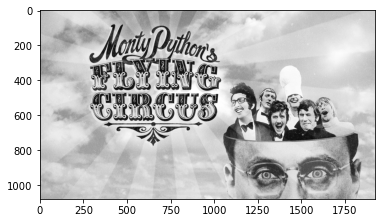

In [100]:
from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
image = image.imread('img/monty-python-flying-circus.png')
pyplot.imshow(image, cmap='gray')

In [101]:
type(image)

numpy.ndarray

In [102]:
image.shape

(1080, 1920)

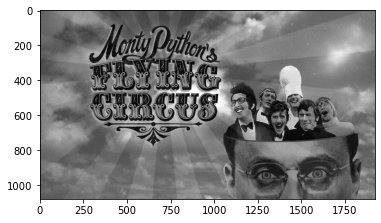

In [112]:
# Up the contrast
darker = image + image**10
pyplot.imshow(darker, cmap='gray')

## Folding and Reshaping Matrices

To really understand arrays (be they vectors, matrices, or arrays with more dimensions), it helps to understand how arrays are actually conceptualized in numpy.

In numpy, arrays are thought of as a one-dimensional string of entries + information about how that data should be "folded". The one dimensional vectors we've been working with, in other words, are just one dimensional strings of data + information saying they shouldn't be folded. A matrix is a one dimensional string of data that gets wrapped into rows and columns. That, in fact, is what is stored in `.shape` -- directions on how numpy should think about the data being wrapped.

One consequence of this is that it's very easy to re-fold data in lots of different ways with `numpy`. For example, I can take a 4 x 3 matrix, and make it 3 x 4:

In [50]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
my_matrix


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
my_matrix.reshape((3, 4))


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

As you can see, numpy thinks of the data as all the numbers along one row (the first dimension) followed by the numbers in the second row, etc., and `reshape` is just changing where each row ends and where the next one begins. 

Indeed, we could even make our data 1 x 12:

In [53]:
my_matrix.reshape((1, 12))


array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

Numpy isn't limited to changing where each row ends and the next one begins, however; it can also change when one *dimension* ends and where the next one begins. So far we've only explicitly worked with 1 and 2 dimensional arrays, but as we noted before, arrays can organize data along arbitrarily many dimensions. We'll talk about this in detail later, but for the moment, let's just take a look at how we can use `reshape` to make our 2-dimensional matrix a 3-dimensional array (namely a 2 x 2 x 3 array):

In [55]:
my_matrix.reshape((2, 2, 3))


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

So remember: in numpy, an array is always just a string of data that is being folded, and the way the data is folded is indicated by `.shape`, and can always be changed with `.reshape()`.

### Reshape and arange

One place this reshape trick can be very useful is in working with `np.arange()`. Unlike `ones` and `zeros`, to which you can pass the output dimensions you want, `np.arange()` will always return 1 dimensional data. That means that if you want a sequence of numbers in a matrix, you have to combine `np.arange()` with `.reshape()`:

In [59]:
np.arange(20)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
np.arange(20).reshape((4, 5))


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Transpose

OK, one other cool trick that's related to reshape that often comes up when working with `np.arange()`: `.transpose()`. The transpose of a matrix is what you get when you make rows into columns and columns into rows. For example:

In [61]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6]])
my_matrix


array([[1, 2, 3],
       [4, 5, 6]])

In [63]:
my_matrix.transpose()


array([[1, 4],
       [2, 5],
       [3, 6]])

Transpose is often combined with `np.array()` and `.reshape()` because otherwise those two tools will always generate sequences that move across rows, then wrap to the next row:

In [64]:
np.arange(6).reshape((2, 3))


array([[0, 1, 2],
       [3, 4, 5]])

So if you want your sequence to move down your *columns* instead of across your *rows*, you have to transpose your result:

In [66]:
np.arange(6).reshape((2, 3)).transpose()


array([[0, 3],
       [1, 4],
       [2, 5]])

Indeed, `.transpose()` is so frequently used in numpy that you can call it with `.T`:

In [67]:
np.arange(6).reshape((2, 3)).T


array([[0, 3],
       [1, 4],
       [2, 5]])

## Recap

- Matrices are a natural extension of vectors from one dimension into two dimensions.
- Matrices are often used in data science both to represent tabular data -- in which each row represents one observation or individual, and each column represents on property -- and also to represent image data.
- Internally, numpy thinks of matrices as a linear string of data + information on how to "fold" that string of data into rows and columns (stored in `.shape`).
  - We can use `.reshape()` to change how numpy folds our data.
  - `.transpose()` or `.T` is another helpful tool for changing the shape of matrices. 


## Next Steps

Now that we're familiar with matrices, [time to learn to manipulate them!](manipulating_matrices.ipynb)